In [64]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [80, 2, 10, 45],
    [90, 2, 8, 50],
    [np.nan, 3, 6, 55],
    [100, 3, 5, 60],
    [110, 3, 4, 65],
    [120, np.nan, 3, 70],
    [130, 4, 2, 150],
    [140, 4, 1, 80]
], dtype=float)


In [65]:
for i in range(4):
    col = data[:, i]
    mean = np.nanmean(col)
    for j in range(len(col)):
        if np.isnan(col[j]):
            data[j, i] = mean

In [66]:
X = data[:, :-1]
Y = data[:, -1]

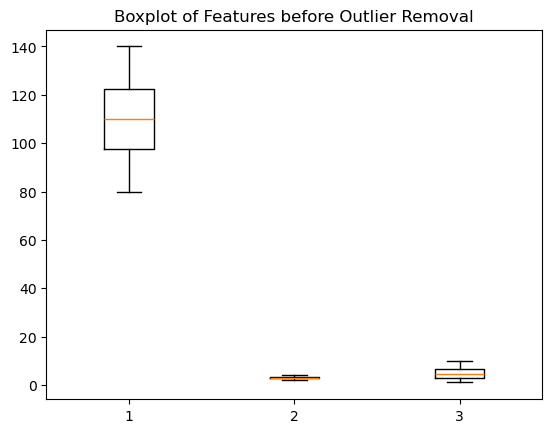

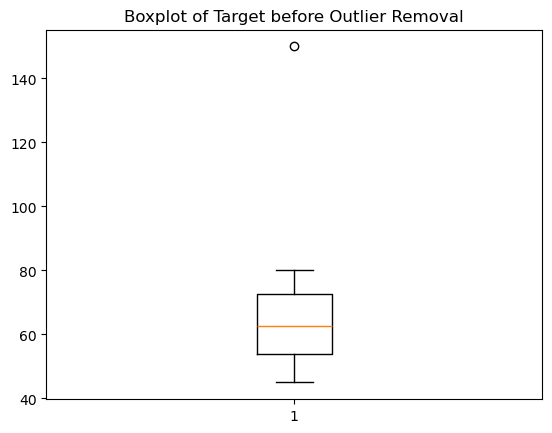

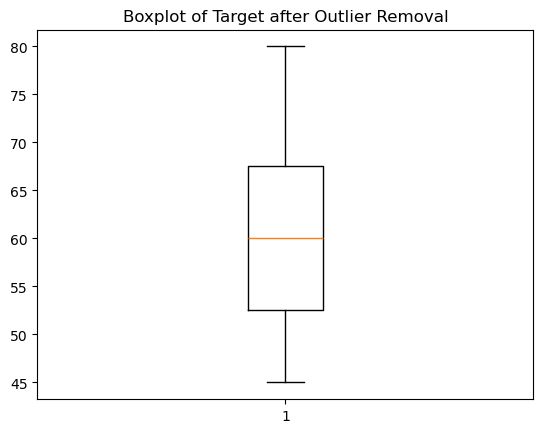

Y after outlier removal:
[45. 50. 55. 60. 65. 70. 80.]


In [67]:
plt.boxplot(X)
plt.title("Boxplot of Features before Outlier Removal")
plt.show()

plt.boxplot(Y)
plt.title("Boxplot of Target before Outlier Removal")
plt.show()

outlier_rows = set()

for i in range(X.shape[1]):
    Q1 = np.percentile(X[:, i], 25)
    Q3 = np.percentile(X[:, i], 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    rows = np.where((X[:, i] < lower) | (X[:, i] > upper))[0]

Q1 = np.percentile(Y, 25)
Q3 = np.percentile(Y, 75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_indices = np.where((Y < lower) | (Y > upper))[0]

X_clean = np.delete(X, outlier_indices, axis=0)
Y_clean = np.delete(Y, outlier_indices, axis=0)


plt.boxplot(Y_clean)
plt.title("Boxplot of Target after Outlier Removal")
plt.show()

print("Y after outlier removal:")
print(Y_clean)

In [68]:
X_clean = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
print(X_clean)
print(Y_clean)

[[0.         0.         1.        ]
 [0.16666667 0.         0.77777778]
 [0.5        0.5        0.55555556]
 [0.33333333 0.5        0.44444444]
 [0.5        0.5        0.33333333]
 [0.66666667 0.5        0.22222222]
 [0.83333333 1.         0.11111111]
 [1.         1.         0.        ]]
[45. 50. 55. 60. 65. 70. 80.]
